In [3]:
%%bigquery df_siconfi
SELECT * FROM `basedosdados.br_me_siconfi.municipio_receitas_orcamentarias`

Downloading: 100%|██████████| 16645435/16645435 [00:09<00:00, 1694882.40rows/s]


df_siconfi.shape

In [6]:
df_siconfi.head(10)

,ano,sigla_uf,id_municipio,estagio,portaria,conta,estagio_bd,id_conta_bd,conta_bd,valor
0,2010,MT,5106224,None,2.4.71.01.00,TrCapConvU SUS,Receitas Brutas Realizadas,None,Transferências de Convênios da União para o Si...,0.0
1,2010,MT,5106315,None,2.4.71.01.00,TrCapConvU SUS,Receitas Brutas Realizadas,None,Transferências de Convênios da União para o Si...,0.0
2,2010,MT,5106281,None,2.4.71.01.00,TrCapConvU SUS,Receitas Brutas Realizadas,None,Transferências de Convênios da União para o Si...,0.0
3,2010,MT,5106372,None,2.4.71.01.00,TrCapConvU SUS,Receitas Brutas Realizadas,None,Transferências de Convênios da União para o Si...,0.0
4,2010,MT,5107701,None,2.4.71.01.00,TrCapConvU SUS,Receitas Brutas Realizadas,None,Transferências de Convênios da União para o Si...,0.0
5,2010,MT,5107248,None,2.4.71.01.00,TrCapConvU SUS,Receitas Brutas Realizadas,None,Transferências de Convênios da União para o Si...,0.0
6,2010,MT,5107404,None,2.4.71.01.00,TrCapConvU SUS,Receitas Brutas Realizadas,None,Transferências de Convênios da União para o Si...,0.0
7,2010,MT,5100300,None,2.4.71.02.00,TrCapConvU Educação,Receitas Brutas Realizadas,None,Transferências de Convênios da União Destinada...,0.0
8,2010,MT,5101001,None,2.4.71.02.00,TrCapConvU Educação,Receitas Brutas Realizadas,None,Transferências de Convênios da União Destinada...,145431.0
9,2010,MT,5101704,None,2.4.71.02.00,TrCapConvU Educação,Receitas Brutas Realizadas,None,Transferências de Convênios da União Destinada...,0.0


In [17]:
id_sampa = df_siconfi[df_siconfi['conta_bd'] == 'Receitas Orçamentárias'].sort_values(by='valor', ascending=False)['id_municipio'].head(1).values[0]
id_sampa

'3550308'

In [19]:
df_sampa = df_siconfi[df_siconfi['id_municipio'] == id_sampa]
df_sampa.head()

,ano,sigla_uf,id_municipio,estagio,portaria,conta,estagio_bd,id_conta_bd,conta_bd,valor
22262,2000,SP,3550308,None,None,Outras Rec Transf Capital,Receitas Brutas Realizadas,None,Outras Transferências de Capital,51333061.27
97962,2000,SP,3550308,None,None,Rec Transf de Capital Estado,Receitas Brutas Realizadas,None,Transferências dos Estados,1435461.83
151186,2000,SP,3550308,None,None,Rec Transf de Capital União,Receitas Brutas Realizadas,None,Transferências da União,866125.79
236116,2000,SP,3550308,None,None,Alienação,Receitas Brutas Realizadas,1.2.2.0.0.00.00.00,Alienação de Bens,0.00
236179,2000,SP,3550308,None,None,Rec Transf de Capital,Receitas Brutas Realizadas,1.2.4.0.0.00.00.00,Transferências de Capital,53634648.89


<AxesSubplot:xlabel='ano'>

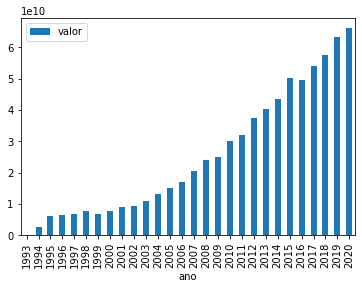

In [26]:
recOrcaSampa = df_sampa[(df_sampa['conta_bd'] == 'Receitas Orçamentárias') & (df_sampa['estagio_bd'] == 'Receitas Brutas Realizadas')][['ano','valor']].sort_values(by='ano')
recOrcaSampa.plot.bar(x = 'ano', y = 'valor')